#📰__Real Fake News Classifier__
We are going to make an algorithm able to determine if an article is fake news or not ?

##1. Problem Statement
> Fake news refers to misinformation, disinformation or mal-information which is spread through word of mouth and traditional media and more recently through digital forms of communication such as edited videos, memes, unverified advertisements and social media propagated rumours


##2. Data
This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.

There is also a version of it available on Kaggle. https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

## Data Exploration

In [16]:
import pandas as pd
true_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/real-fake-news/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/real-fake-news/Fake.csv')

In [17]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [18]:
true_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [19]:
true_df.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [20]:
fake_df.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [21]:
true_df['target'] = 1
fake_df['target'] = 0

In [22]:
frame = [true_df, fake_df]
df = pd.concat(frame, ignore_index=True)
df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [23]:
df['text'] = df.title + df.text
df = df.drop('title', axis=1)
df.head()

,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1


In [24]:
df_shuffled = df.sample(frac=0.1, random_state=12)
df_shuffled

,text,subject,date,target
12896,UAE denounces U.S. recognition of Jerusalem as...,worldnews,"December 7, 2017",1
23935,"Trump Whines About Fake News, CNN’s Chris Cuo...",News,"February 15, 2017",0
17679,Czechs pin hopes on billionaire Babis to fix t...,worldnews,"October 12, 2017",1
30477,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,politics,17-Feb-18,0
4227,Highlights: The Trump presidency on April 21 a...,politicsNews,"April 21, 2017",1
...,...,...,...,...
19395,Australian police charge man for attacking for...,worldnews,"September 22, 2017",1
44283,Hersh: Trump Knew ‘Assad Sarin Attack’ Story W...,Middle-east,"June 27, 2017",0
668,U.S. House will reject total elimination of st...,politicsNews,"November 12, 2017",1
26037,GOP Rep. Makes IMPOSSIBLY Asinine Demand Of F...,News,"September 15, 2016",0


In [25]:
df_shuffled.target.value_counts()

0    2393
1    2097
Name: target, dtype: int64

In [26]:
df_shuffled.drop(['date', 'subject'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


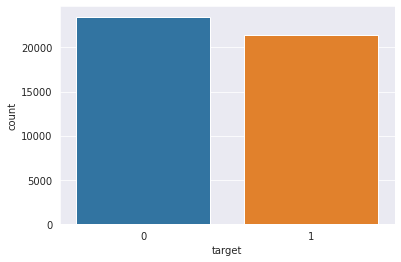

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df.target);

## Modelling
We'll use sklearn miltinomial nb using tf-idf (Bidirectional)

In [29]:
X = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

In [30]:
train_split = round(0.7 * len(df_shuffled))
val_split = round(train_split + 0.15 * len(df_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_val, y_val = X[train_split: val_split], y[train_split: val_split]
X_test, y_test = X[val_split:], y[val_split:]

len(X_train), len(X_val), len(X_test)

(3143, 673, 674)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
   ('tf-idf', TfidfVectorizer()),
   ('clf', MultinomialNB())
])

model_0.fit(X_train.text, y_train)

model_0.score(X_val.text, y_val)

0.9197622585438335

In [32]:
model_0_predict = model_0.predict(X_test.text)
model_0_predict[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_result(y_true, y_pred):
  '''
  claculate model accuracy, precision, recall and f1score od binary classification model
  '''
  # Calcualte model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # calculate model precision recall and f1score using "weighted"
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'presicion': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results


In [34]:
calculate_result(y_test, model_0_predict)

{'accuracy': 91.83976261127597,
 'f1': 0.9176050769259906,
 'presicion': 0.9239063483499685,
 'recall': 0.9183976261127597}

##**Making Prediction on wild**
* true : 1
* fake : 0

In [35]:
text = '''
Modi highlights significance of CAA during talks with Afghan Sikh-Hindu group; they dub him 'PM of the world' New Delhi: Prime Minister Narendra Modi on Saturday met with members of the Sikh-Hindu delegation from Afghanistan at his residence. The delegation hailed the central government for enacting the Citizenship Amendment Act (CAA) during the interaction at 7 Lok Kalyan Marg and thanked the PM for bringing Sikhs and Hindus safely to India from Afghanistamn."PM welcomed the delegation and said that they are not guests but are in their own house, adding that India is their home. He talked about the immense difficulties faced by them in Afghanistan and the help provided by the government to bring them to India safely," the Prime Minister's Office recounted after the meeting. According to official updates, Modi had talked about the significance of the CAA and its benefits for the community, assuring them of continuous support to resolve all issues and difficulties faced. "Only you (PM Modi) can understand the pain of the Indians and Sikhs living across the country. Wherever there is a problem I see you came forward," reports quoted one of the delegation members as stating. They also praised Modi for taking various steps to allow minorities in the neighbouring South Asian countries to obtain Indian citizenship.According to the press note released by the PIB, the group had contended that he was "he is not just the Prime Minister of India, but the Prime Minister of the world", adding that he understood the difficulties faced (especially by Hindus and Sikhs across the world) and made all efforts to provide immediate help.
'''
text

'\nModi highlights significance of CAA during talks with Afghan Sikh-Hindu group; they dub him \'PM of the world\' New Delhi: Prime Minister Narendra Modi on Saturday met with members of the Sikh-Hindu delegation from Afghanistan at his residence. The delegation hailed the central government for enacting the Citizenship Amendment Act (CAA) during the interaction at 7 Lok Kalyan Marg and thanked the PM for bringing Sikhs and Hindus safely to India from Afghanistamn."PM welcomed the delegation and said that they are not guests but are in their own house, adding that India is their home. He talked about the immense difficulties faced by them in Afghanistan and the help provided by the government to bring them to India safely," the Prime Minister\'s Office recounted after the meeting. According to official updates, Modi had talked about the significance of the CAA and its benefits for the community, assuring them of continuous support to resolve all issues and difficulties faced. "Only you

In [37]:
pred = model_0.predict([text])
pred

array([1])

In [38]:
text1 = '''
Hi This is me, I have greduated finally
'''
model_0.predict([text1])

array([0])